# Logistic Regression (Diabetes)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Exploratory Data Analysis and Visualization


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/msddk/DS_Bootcamp/main/Machine%20Learning/Logistic%20Regression/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1



*   DiabetesPedigreeFunction: Diabetes history in relatives
*   BMI: Body mass index

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

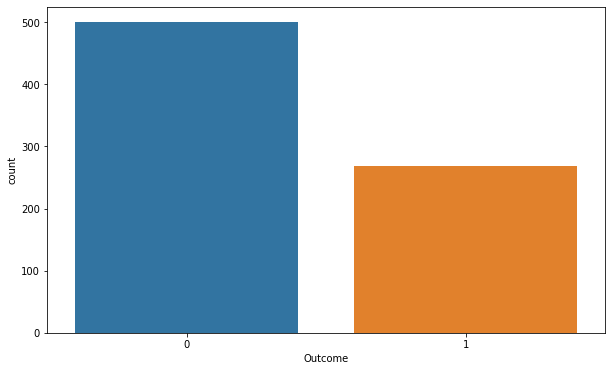

In [8]:
sns.countplot(df.Outcome)

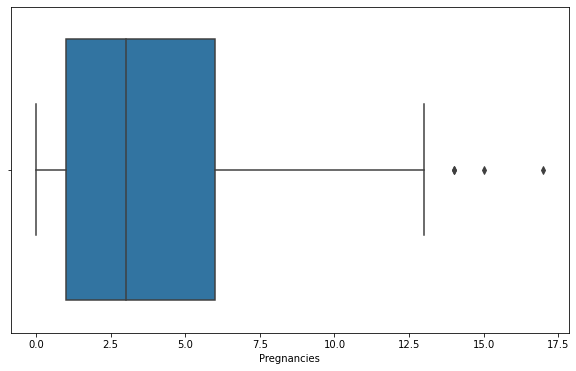

In [9]:
sns.boxplot(df.Pregnancies)

In [19]:
df=df[df.Pregnancies<13]

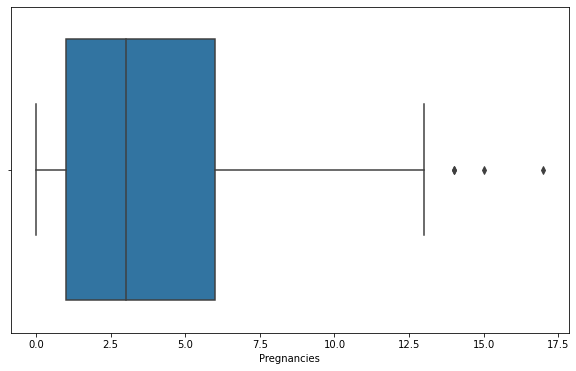

In [11]:
sns.boxplot(df.Pregnancies)

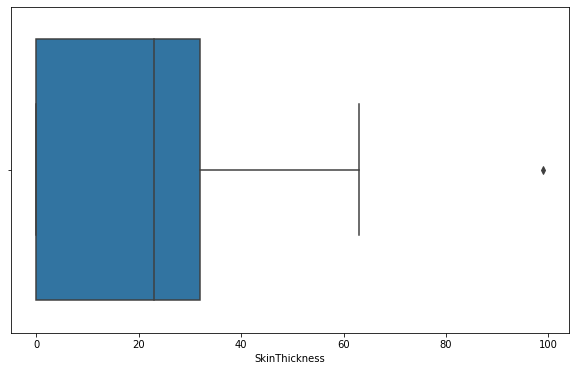

In [12]:
sns.boxplot(df.SkinThickness)

In [13]:
df=df[df.SkinThickness<70]

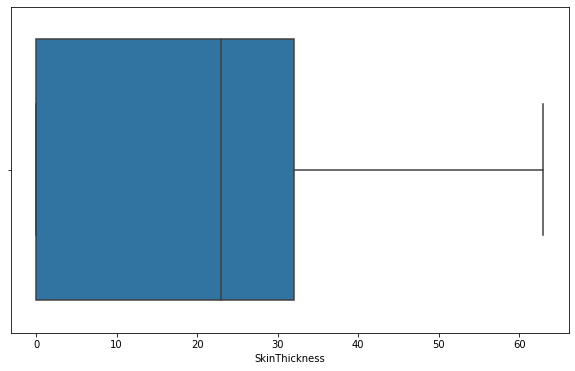

In [14]:
sns.boxplot(df.SkinThickness)

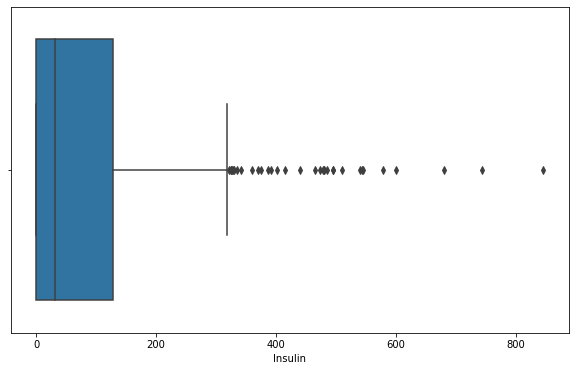

In [15]:
sns.boxplot(df.Insulin)

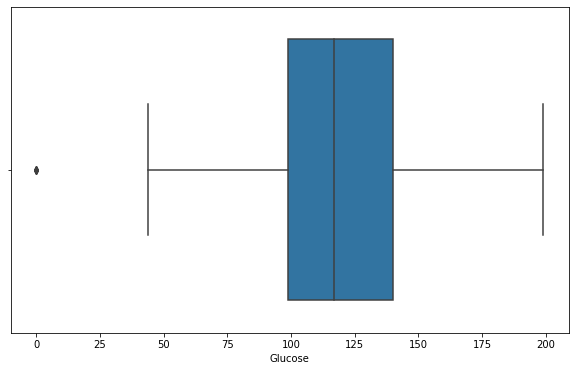

In [16]:
sns.boxplot(df.Glucose)

In [17]:
df=df[df.Glucose>0]

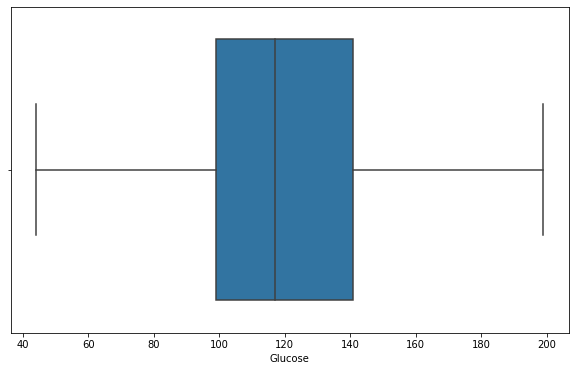

In [18]:
sns.boxplot(df.Glucose)

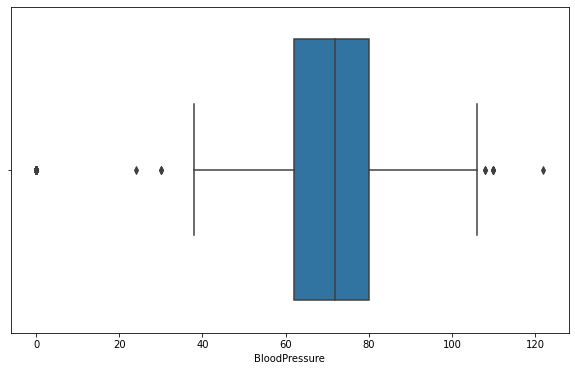

In [20]:
sns.boxplot(df.BloodPressure)

In [21]:
df=df[df.BloodPressure>35]

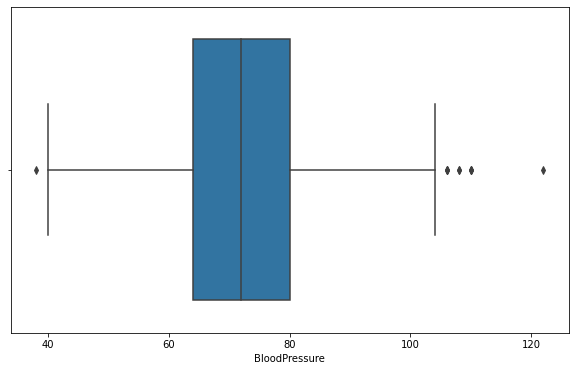

In [22]:
sns.boxplot(df.BloodPressure)

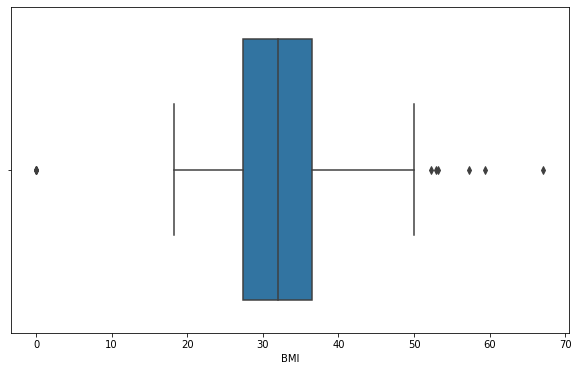

In [23]:
sns.boxplot(df.BMI)

In [24]:
df=df[df.BMI>0]

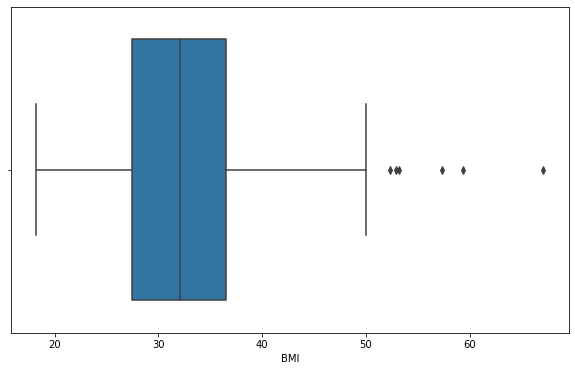

In [25]:
sns.boxplot(df.BMI)

In [26]:
df.shape

(707, 9)

In [27]:
df.Outcome.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

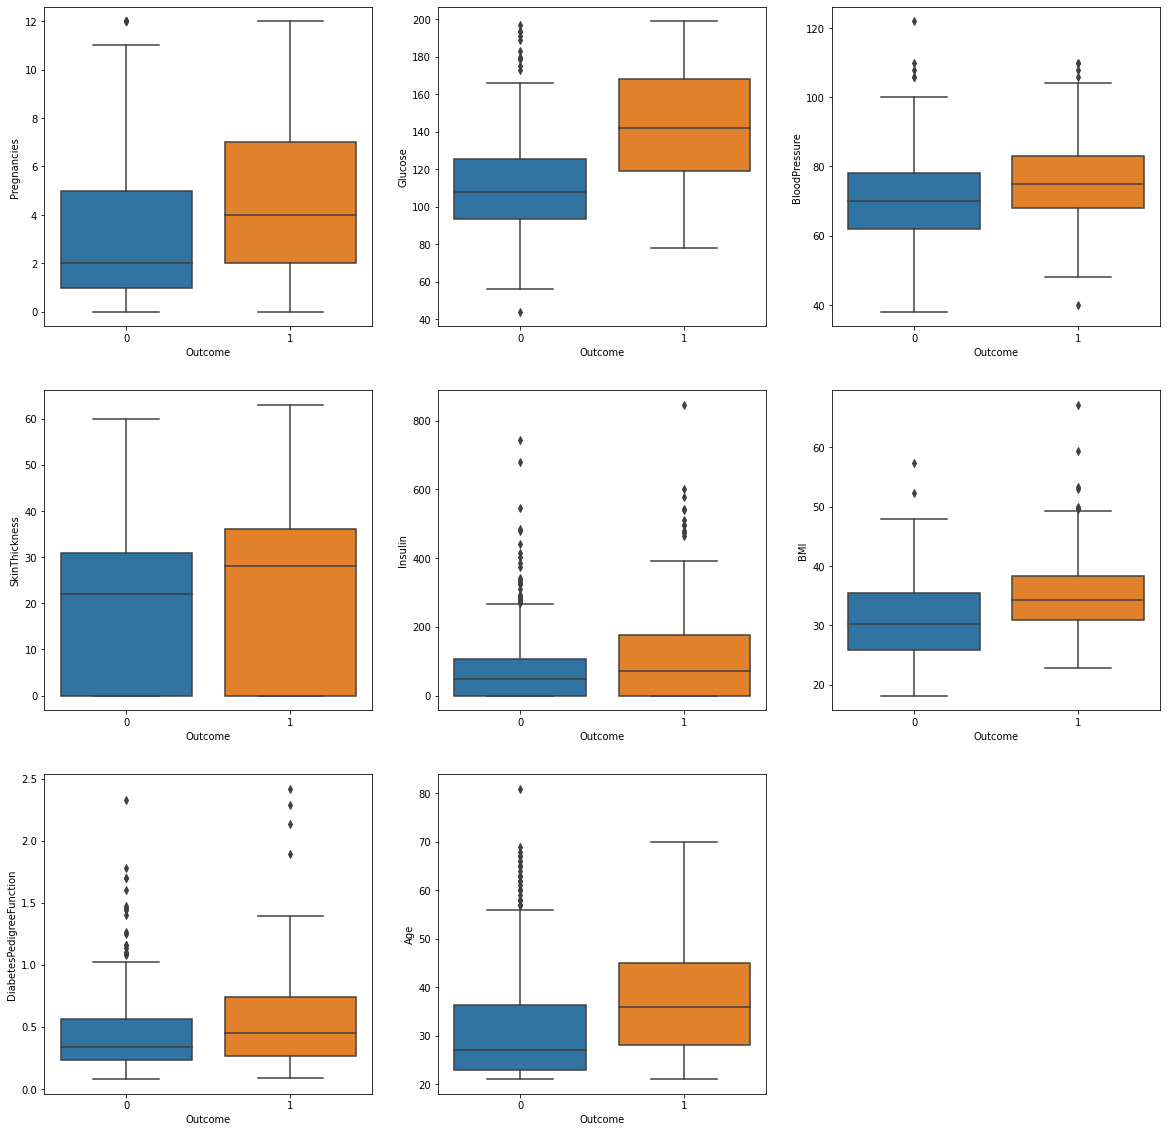

In [28]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

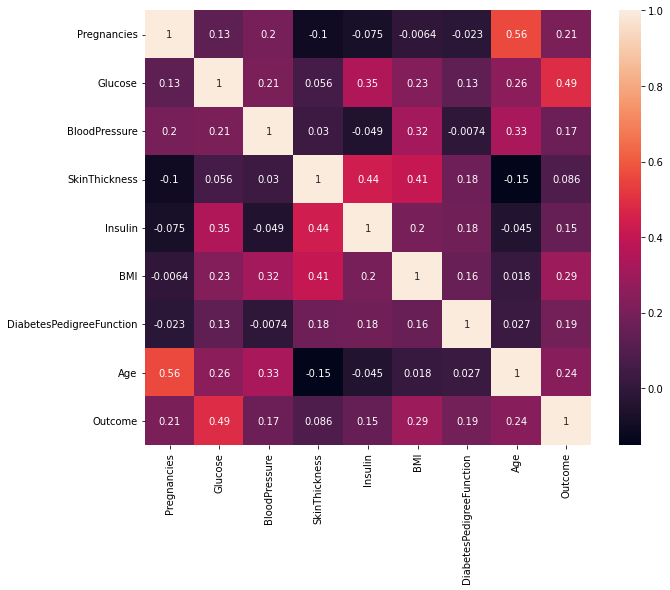

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

- 2 different way of showing correlation

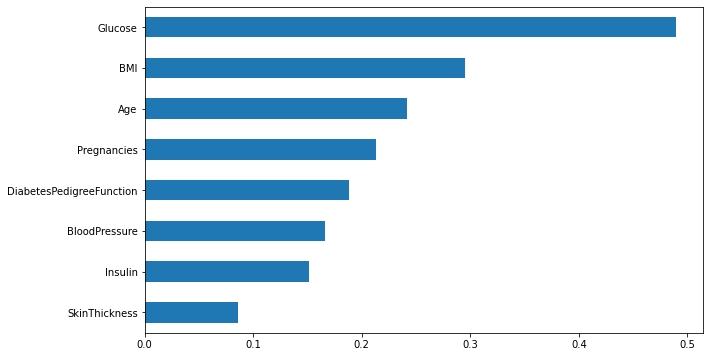

In [30]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

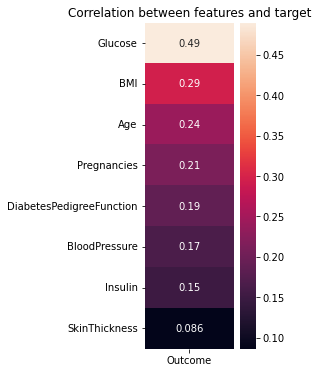

In [31]:
plt.figure(figsize=(2,6))
target=['Outcome']
sns.heatmap(df.corr()[target].sort_values(by=target,ascending=False).drop(labels=target,axis=0), annot=True)
plt.title("Correlation between features and target")
plt.yticks(rotation=0);

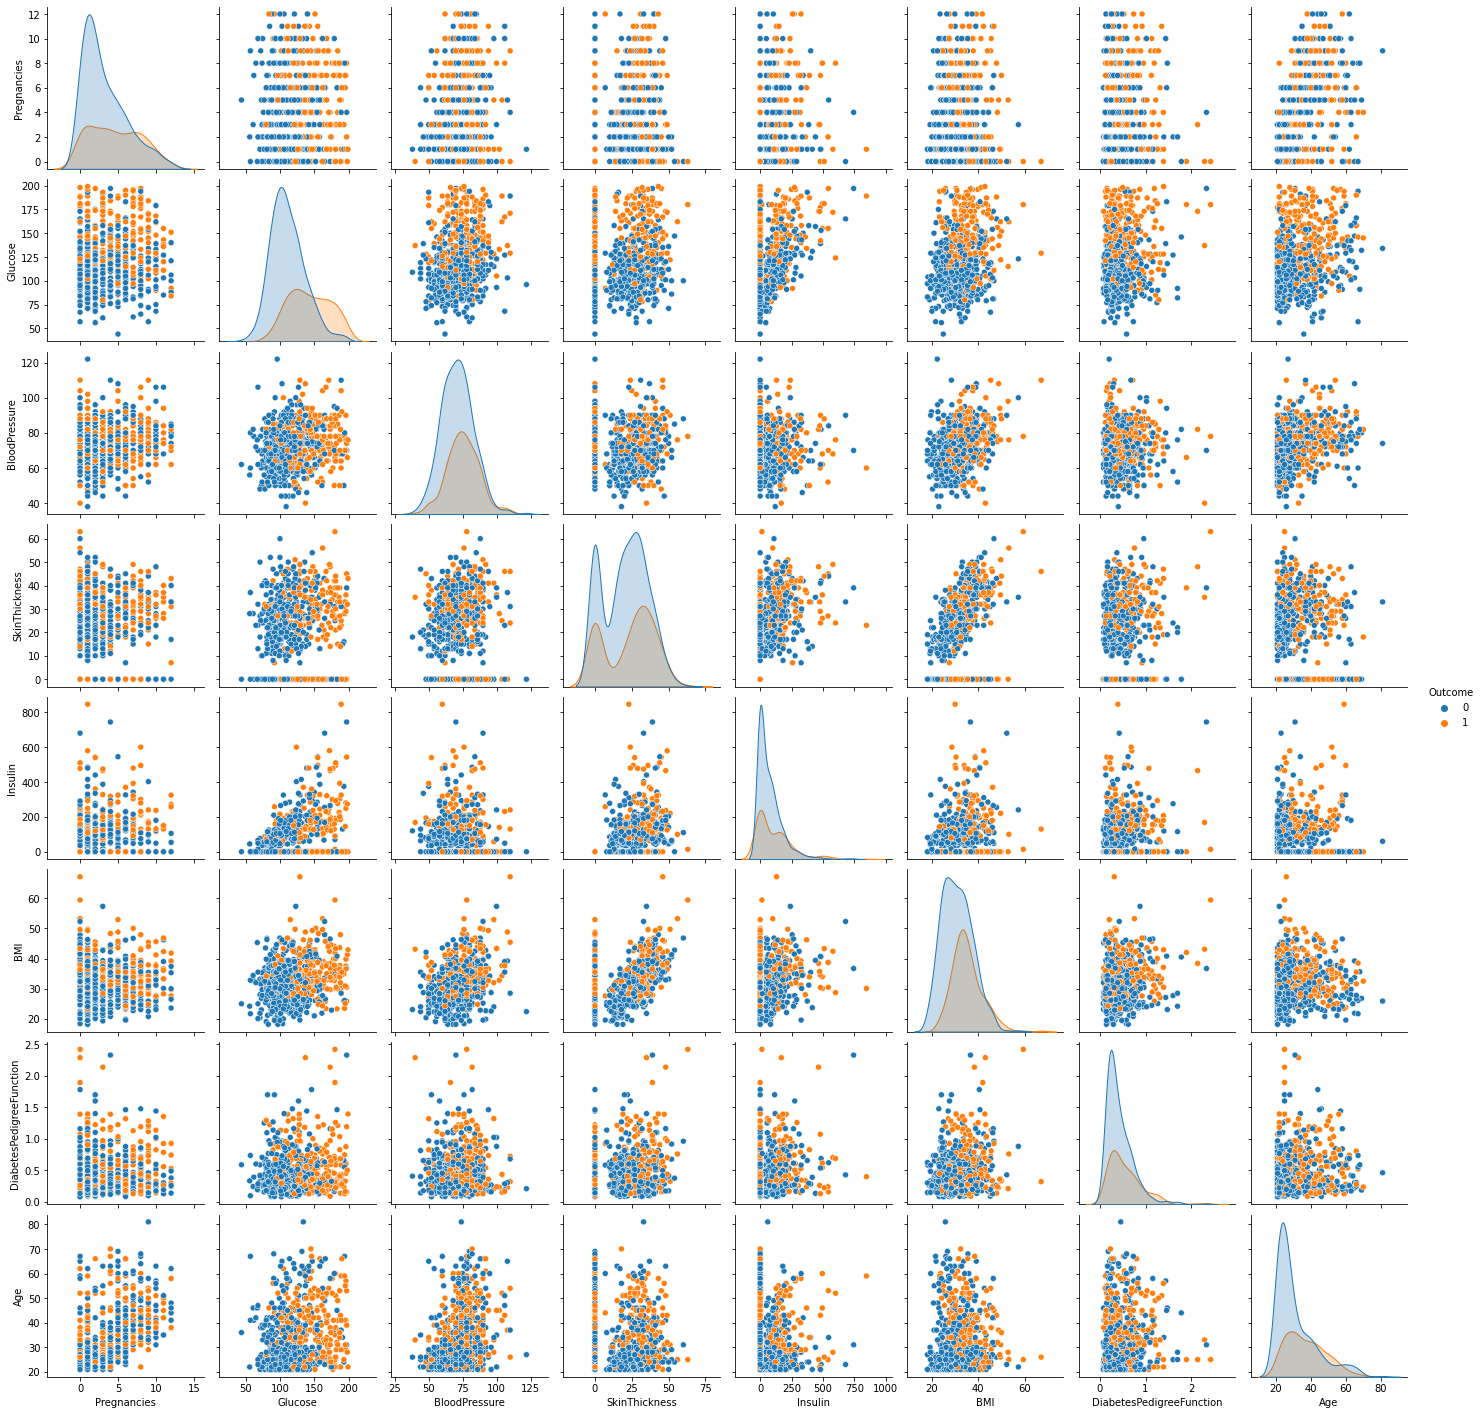

In [33]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split and Scaling

In [35]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model=LogisticRegression()

In [42]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
y_pred=log_model.predict(X_test_scaled)

In [44]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [45]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
374,2,122,52,43,158,36.200,0.816,28,0,0,0.437
335,0,165,76,43,255,47.900,0.259,26,0,1,0.778
70,2,100,66,20,90,32.900,0.867,28,1,0,0.166
149,2,90,70,17,0,27.300,0.085,22,0,0,0.044
586,8,143,66,0,0,34.900,0.129,41,1,1,0.595
48,7,103,66,32,0,39.100,0.344,31,1,0,0.375
530,2,122,60,18,106,29.800,0.717,22,0,0,0.231
413,1,143,74,22,61,26.200,0.256,21,0,0,0.220
710,3,158,64,13,387,31.200,0.295,24,0,0,0.392
196,1,105,58,0,0,24.300,0.187,21,0,0,0.055


## Model Performance on Classification Tasks

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [48]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85  9]
 [27 21]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        94
           1       0.70      0.44      0.54        48

    accuracy                           0.75       142
   macro avg       0.73      0.67      0.68       142
weighted avg       0.74      0.75      0.73       142


Train_Set
[[332  42]
 [ 83 108]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       374
           1       0.72      0.57      0.63       191

    accuracy                           0.78       565
   macro avg       0.76      0.73      0.74       565
weighted avg       0.77      0.78      0.77       565



## Cross Validate

In [49]:
from sklearn.model_selection import cross_validate

In [54]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:,2:]

,test_precision,test_recall,test_f1,test_accuracy
1,0.600,0.632,0.615,0.737
2,1.000,0.263,0.417,0.754
3,0.643,0.474,0.545,0.737
4,0.688,0.579,0.629,0.772
5,0.833,0.500,0.625,0.789
6,0.833,0.526,0.645,0.804
7,0.867,0.684,0.765,0.857
8,0.579,0.579,0.579,0.714
9,0.667,0.526,0.588,0.750
10,0.714,0.789,0.750,0.821


In [51]:
df_scores.mean()[2:]

test_precision   0.742
test_recall      0.555
test_f1          0.616
test_accuracy    0.774
dtype: float64

In [52]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85  9]
 [27 21]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        94
           1       0.70      0.44      0.54        48

    accuracy                           0.75       142
   macro avg       0.73      0.67      0.68       142
weighted avg       0.74      0.75      0.73       142


Train_Set
[[332  42]
 [ 83 108]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       374
           1       0.72      0.57      0.63       191

    accuracy                           0.78       565
   macro avg       0.76      0.73      0.74       565
weighted avg       0.77      0.78      0.77       565



## Cross Validate for 0 class

In [55]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [57]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label = 0)
precision_0 = make_scorer(precision_score, pos_label = 0)
recall_0 = make_scorer(recall_score, pos_label = 0)

In [58]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}, 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.iloc[:,2:]

,test_precision_0,test_recall_0,test_f1_0
1,0.811,0.789,0.800
2,0.731,1.000,0.844
3,0.767,0.868,0.815
4,0.805,0.868,0.835
5,0.778,0.946,0.854
6,0.795,0.946,0.864
7,0.854,0.946,0.897
8,0.784,0.784,0.784
9,0.780,0.865,0.821
10,0.886,0.838,0.861


In [59]:
df_scores.mean()[2:]

test_precision_0   0.799
test_recall_0      0.885
test_f1_0          0.838
dtype: float64

In [62]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[85  9]
 [27 21]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        94
           1       0.70      0.44      0.54        48

    accuracy                           0.75       142
   macro avg       0.73      0.67      0.68       142
weighted avg       0.74      0.75      0.73       142


Train_Set
[[332  42]
 [ 83 108]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       374
           1       0.72      0.57      0.63       191

    accuracy                           0.78       565
   macro avg       0.76      0.73      0.74       565
weighted avg       0.77      0.78      0.77       565



## GridSearchCV

In [63]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [64]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [65]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [66]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [67]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 19]
 [14 34]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        94
           1       0.64      0.71      0.67        48

    accuracy                           0.77       142
   macro avg       0.74      0.75      0.75       142
weighted avg       0.77      0.77      0.77       142


Train_Set
[[287  87]
 [ 53 138]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       374
           1       0.61      0.72      0.66       191

    accuracy                           0.75       565
   macro avg       0.73      0.74      0.73       565
weighted avg       0.77      0.75      0.76       565



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e

In [68]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

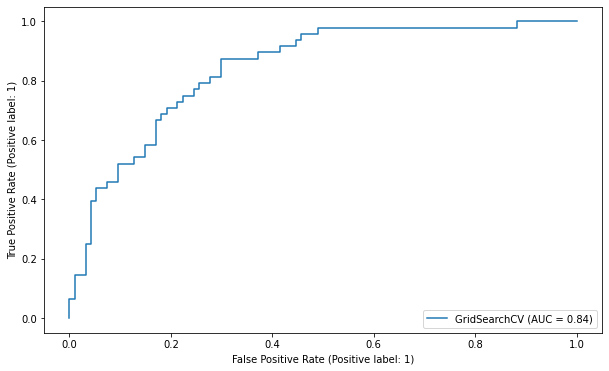

In [69]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

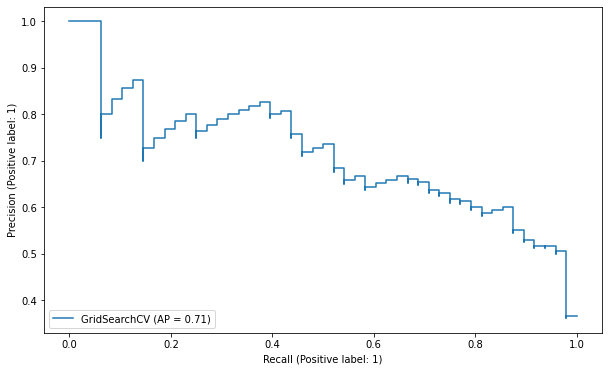

In [70]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold for max recall score

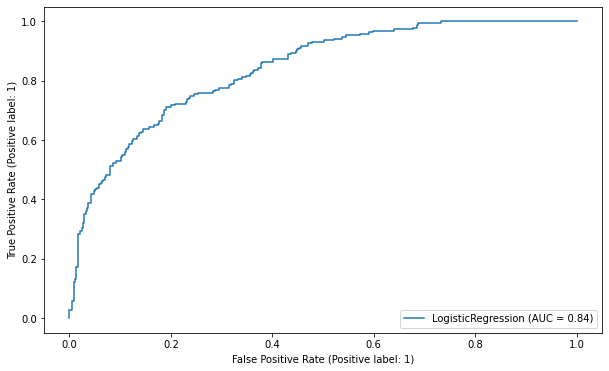

In [71]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [72]:
y_pred_proba = log_model.predict_proba(X_train_scaled) #
roc_auc_score(y_train, y_pred_proba[:,1])

0.8399081669793096

In [73]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [74]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.35410020184923685

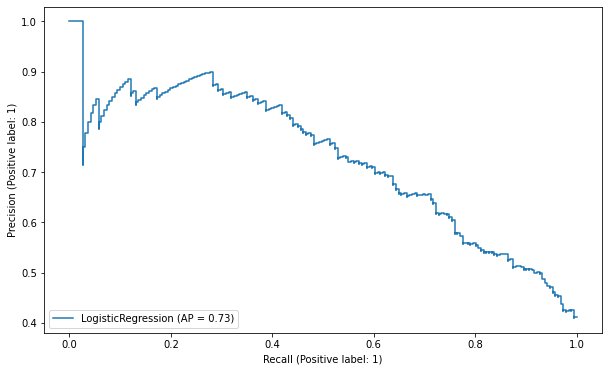

In [75]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [76]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.726044083760224

In [77]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [78]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.35410020184923685

In [79]:
grid_model.predict_proba(X_test_scaled)[:,1]

array([0.12576478, 0.58837623, 0.4249635 , 0.17248201, 0.24470849,
       0.5924443 , 0.53878583, 0.10434027, 0.32358785, 0.17217596,
       0.22067647, 0.53521224, 0.47339415, 0.64395315, 0.56393433,
       0.19386621, 0.13347127, 0.34480451, 0.80280088, 0.59252419,
       0.84493484, 0.18840406, 0.25233553, 0.41141938, 0.86917435,
       0.42095013, 0.58841958, 0.43302112, 0.2350476 , 0.13920991,
       0.10828802, 0.89535144, 0.86955153, 0.90368422, 0.19816083,
       0.37422332, 0.73156301, 0.25115679, 0.31917065, 0.50340134,
       0.11704435, 0.45739214, 0.15073641, 0.23289575, 0.68060148,
       0.44880204, 0.11565765, 0.25040273, 0.86446611, 0.58586217,
       0.27078145, 0.3817784 , 0.67239872, 0.12261914, 0.35347852,
       0.63946407, 0.26409627, 0.45059389, 0.04408941, 0.15263288,
       0.49799938, 0.43021111, 0.15639589, 0.27755704, 0.31725433,
       0.48953563, 0.47733943, 0.39612116, 0.43861652, 0.49080686,
       0.31895831, 0.42428441, 0.6543317 , 0.22300393, 0.44850

In [80]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [81]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[53 41]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.93      0.56      0.70        94
           1       0.52      0.92      0.66        48

    accuracy                           0.68       142
   macro avg       0.72      0.74      0.68       142
weighted avg       0.79      0.68      0.69       142



In [82]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[211 163]
 [ 19 172]]
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       374
           1       0.51      0.90      0.65       191

    accuracy                           0.68       565
   macro avg       0.72      0.73      0.68       565
weighted avg       0.78      0.68      0.68       565



## Final Model and Model Deployment

In [83]:
scaler = StandardScaler().fit(X)

In [84]:
import pickle
pickle.dump(scaler, open("scaler_diabates", 'wb'))

In [85]:
X_scaled = scaler.transform(X)

In [86]:
final_model = LogisticRegression(C= 0.1, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear').fit(X_scaled, y)

In [87]:
pickle.dump(final_model, open("final_model_diabates", 'wb'))

In [88]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,707.000,3.702,3.121,0.000,1.000,3.000,6.000,12.000
Glucose,707.000,121.734,30.657,44.000,99.000,117.000,141.000,199.000
BloodPressure,707.000,72.481,12.012,38.000,64.000,72.000,80.000,122.000
SkinThickness,707.000,21.296,15.422,0.000,0.000,24.000,33.000,63.000
Insulin,707.000,85.262,117.940,0.000,0.000,49.000,133.500,846.000
BMI,707.000,32.372,6.847,18.200,27.400,32.100,36.500,67.100
DiabetesPedigreeFunction,707.000,0.476,0.334,0.078,0.245,0.378,0.630,2.420
Age,707.000,33.139,11.729,21.000,24.000,29.000,40.000,81.000


# Using the Model

In [89]:
my_dict = {"Pregnancies": [3, 6, 5],
           "Glucose": [117, 140, 120],
           "BloodPressure": [72, 80, 75],
           "SkinThickness": [23, 33, 25],
           "Insulin": [48, 132, 55],
           "BMI": [32, 36.5, 34],
           "DiabetesPedigreeFunction": [0.38, 0.63, 0.45],
           "Age": [29, 40, 33]
          }

In [90]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [91]:
scaler_diabates = pickle.load(open("scaler_diabates", "rb"))

In [92]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled

array([[-0.22495888, -0.15452894, -0.04006354,  0.11059814, -0.31615997,
        -0.0543865 , -0.28684307, -0.35310219],
       [ 0.73701246,  0.59623148,  0.62640516,  0.75950177,  0.3965681 ,
         0.60327464,  0.46316082,  0.58540625],
       [ 0.41635535, -0.05660367,  0.20986223,  0.24037887, -0.25676596,
         0.23790734, -0.07684198, -0.01182639]])

In [93]:
final_model = pickle.load(open("final_model_diabates", "rb"))

In [94]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [95]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.34"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.34
0,3,117,72,23,48,32.000,0.380,29,0.372,0,1
1,6,140,80,33,132,36.500,0.630,40,0.762,1,1
2,5,120,75,25,55,34.000,0.450,33,0.502,1,1
